In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.stats as stm
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import statsmodels.api as sm

In [2]:
permcrop5_df = pd.read_csv('../CSVs/Permanent_Crop_NUTS5_2019.csv', sep=",")
tempcrop5_df = pd.read_csv('../CSVs/Temporary_Crop_NUTS5_2019.csv', sep=",")
education5_df = pd.read_csv('../CSVs/Education_NUTS5_2019.csv', sep=",")
labour5_df = pd.read_csv('../CSVs/Labour_NUTS5_2019.csv', sep=",")
prod5_df = pd.read_csv('../CSVs/Production_NUTS5_2019.csv', sep=",")

In [3]:
permcrop5_df.head()

,NutsID,region_name,NUTS_level,pc.year,pc.area,pc.hold,pcn.crop_name
0,111160101,Aboim das Choças,5,2019,13,32,Total
1,111160101,Aboim das Choças,5,2019,0,0,Fresh fruit plantations (excluding citrus plan...
2,111160101,Aboim das Choças,5,2019,0,1,Citrus plantations
3,111160101,Aboim das Choças,5,2019,0,0,Fruit plantations (subtropical climate zones)
4,111160101,Aboim das Choças,5,2019,0,1,Nuts plantations


In [4]:
prod5_df.head()

,NutsID,region_name,NUTS_level,p.year,p.value_eur,p.area_ha
0,111160101,Aboim das Choças,5,2019,101072,1921.9
1,111160102,Aguiã,5,2019,156561,1642.8
2,111160104,Ázere,5,2019,140132,2428.6
3,111160105,Cabana Maior,5,2019,189450,152.7
4,111160106,Cabreiro,5,2019,612235,221.4


In [5]:
all_dfs = [permcrop5_df, tempcrop5_df, education5_df, labour5_df, prod5_df]

def map_value(value):
    digits = str(value)[:2]
    if digits == '11':
        return 'Norte'
    elif digits == '15':
        return 'Algarve'
    elif digits == '16':
        return 'Centro'
    elif digits == '17':
        return 'Lisboa'
    elif digits == '18':
        return 'Alentejo'
    elif digits == '20':
        return 'Açores'
    elif digits == '30':
        return 'Madeira'
    else:
        return '-'

for df in all_dfs:
    df['NUTS2_region'] = df['NutsID'].apply(map_value)
    print(df['NUTS2_region'].unique())

['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']
['Norte' 'Centro' 'Lisboa' 'Alentejo' 'Algarve' 'Açores' 'Madeira']
['Norte' 'Algarve' 'Centro' 'Lisboa' 'Alentejo' 'Açores' 'Madeira']


In [6]:
education5_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15460 entries, 0 to 15459
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   NutsID              15460 non-null  object
 1   region_name         15460 non-null  object
 2   NUTS_level          15460 non-null  int64 
 3   e.year              15460 non-null  int64 
 4   e.value             15460 non-null  int64 
 5   el.education_level  12368 non-null  object
 6   NUTS2_region        15460 non-null  object
dtypes: int64(3), object(4)
memory usage: 845.6+ KB


In [7]:
prod5_df['NUTS2_region'].unique()

array(['Norte', 'Algarve', 'Centro', 'Lisboa', 'Alentejo', 'Açores',
       'Madeira'], dtype=object)

# Education

In [8]:
education5_df.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region
0,111160101,Aboim das Choças,5,2019,94,Total,Norte
1,111160102,Aguiã,5,2019,99,Total,Norte
2,111160104,Ázere,5,2019,68,Total,Norte
3,111160105,Cabana Maior,5,2019,63,Total,Norte
4,111160106,Cabreiro,5,2019,204,Total,Norte


In [9]:
education5_df['el.education_level'].fillna('None', inplace=True)

In [10]:
ed_no_totals = education5_df[education5_df['el.education_level'] != 'Total'].copy()
ed_totals = education5_df[education5_df['el.education_level'] == 'Total'].copy()

In [11]:
ed_totals.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region
0,111160101,Aboim das Choças,5,2019,94,Total,Norte
1,111160102,Aguiã,5,2019,99,Total,Norte
2,111160104,Ázere,5,2019,68,Total,Norte
3,111160105,Cabana Maior,5,2019,63,Total,Norte
4,111160106,Cabreiro,5,2019,204,Total,Norte


In [12]:
def ed_percentage(row):
    id = row['NutsID']
    value = row['e.value']
    total = ed_totals[ed_totals['NutsID'] == id]['e.value'].values[0]
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [13]:
ed_no_totals.loc[:, 'ed_level_perc'] = ed_no_totals.apply(ed_percentage, axis=1)

In [14]:
ed_no_totals.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region,ed_level_perc
780,111160101,Aboim das Choças,5,2019,15,None,Norte,15.96
781,111160102,Aguiã,5,2019,24,None,Norte,24.24
782,111160104,Ázere,5,2019,3,None,Norte,4.41
783,111160105,Cabana Maior,5,2019,24,None,Norte,38.10
784,111160106,Cabreiro,5,2019,66,None,Norte,32.35


In [15]:
ed_no_totals['ed_level_perc'].isna().value_counts()

ed_level_perc
False    12256
True       112
Name: count, dtype: int64

In [16]:
nuts2_order = ['Norte', 'Centro', 'Lisboa', 'Alentejo', 'Algarve', 'Açores', 'Madeira']

In [17]:
education_order = ['None', 'Basic', 'Secondary / post-secondary', 'Superior']

In [18]:
ed_no_total_graph = ed_no_totals.copy()

In [19]:
# Convert the column to a categorical type with the custom order
ed_no_total_graph['NUTS2_region'] = pd.Categorical(ed_no_total_graph['NUTS2_region'], 
                                                   categories=nuts2_order, 
                                                   ordered=True)
ed_no_total_graph['el.education_level'] = pd.Categorical(ed_no_total_graph['el.education_level'], 
                                                         categories=education_order, 
                                                         ordered=True)

In [20]:
# Sort the DataFrame by the custom order
ed_no_total_graph = ed_no_total_graph.sort_values(['NUTS2_region', 'el.education_level']).reset_index(drop=True)

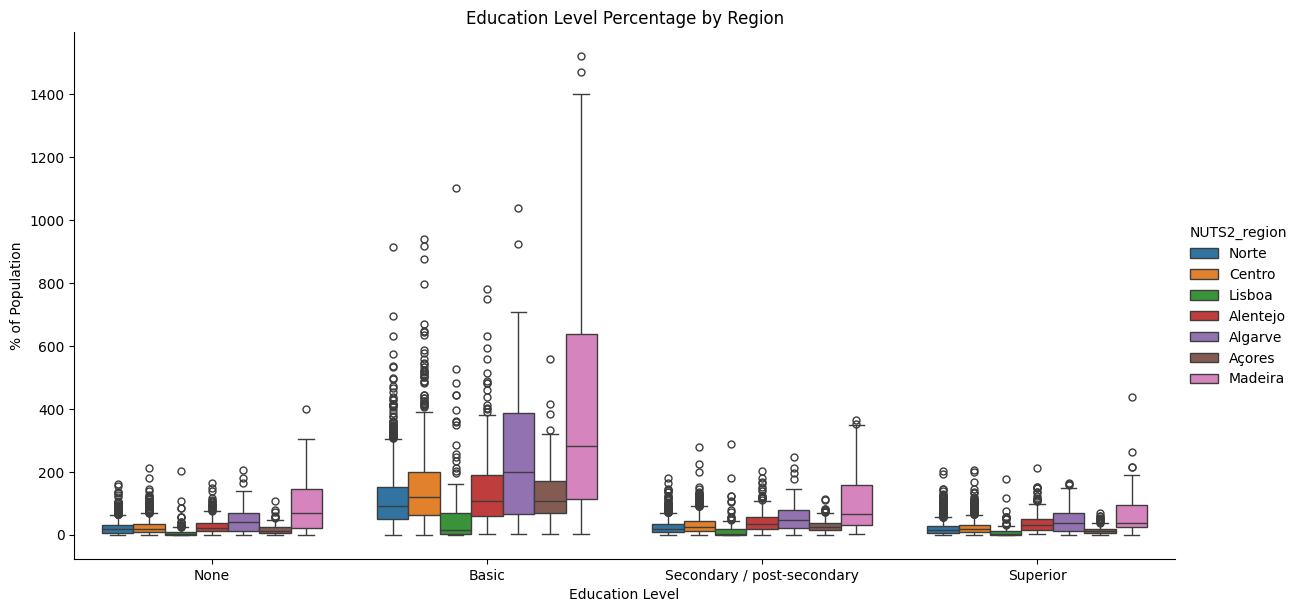

In [21]:
sns.catplot(
    data=ed_no_total_graph,
    x="el.education_level",
    y="e.value",
    hue="NUTS2_region",
    kind="box",
    height=6,
    aspect=2
)
plt.title('Education Level Percentage by Region')
plt.xlabel('Education Level')
plt.ylabel('% of Population')
plt.show()

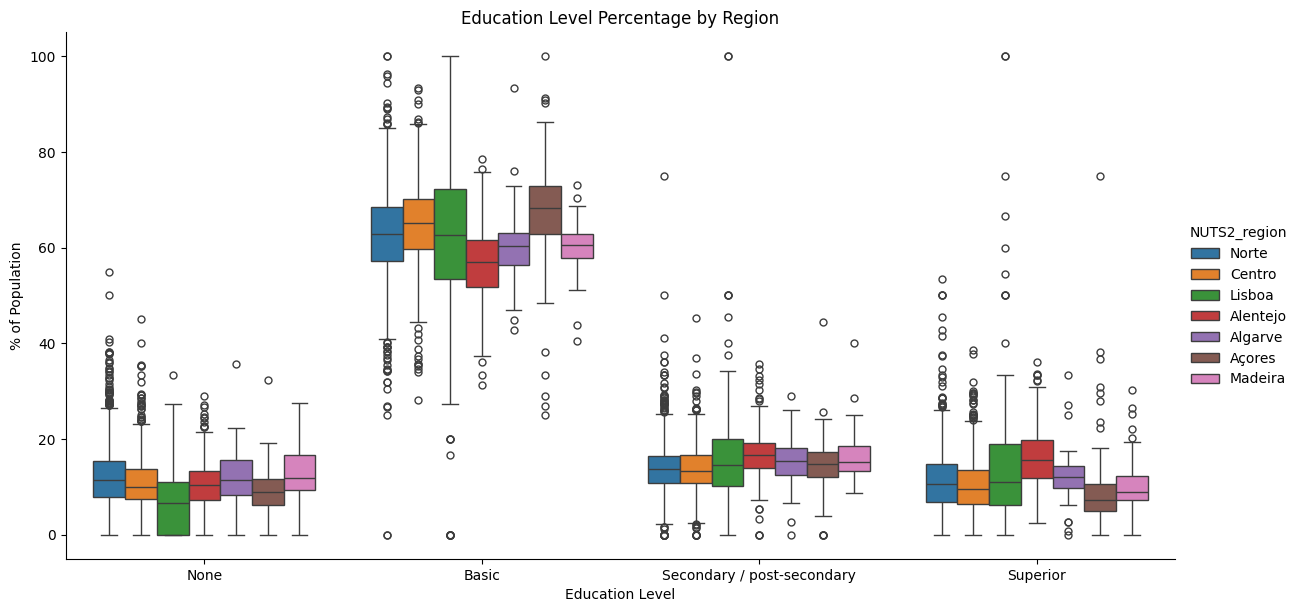

In [22]:
sns.catplot(
    data=ed_no_total_graph,
    x="el.education_level",
    y="ed_level_perc",
    hue="NUTS2_region",
    kind="box",
    height=6,
    aspect=2
)
plt.title('Education Level Percentage by Region')
plt.xlabel('Education Level')
plt.ylabel('% of Population')
plt.show()

In [23]:
ed_no_totals[ed_no_totals['NUTS2_region'] == 'Lisboa'].describe()

,NUTS_level,e.year,e.value,ed_level_perc
count,472.0,472.0,472.000000,400.000000
mean,5.0,2019.0,28.654661,25.000025
std,0.0,0.0,83.118782,26.735509
min,5.0,2019.0,0.000000,0.000000
25%,5.0,2019.0,0.000000,6.577500
50%,5.0,2019.0,3.000000,14.045000
75%,5.0,2019.0,20.000000,44.917500
max,5.0,2019.0,1102.000000,100.000000


In [24]:
ed_none_basic = ed_no_totals[ed_no_totals['el.education_level'].isin(['None', 'Basic'])]
ed_nb_sum = ed_none_basic.groupby(['NutsID', 'NUTS2_region'])['ed_level_perc'].sum().reset_index()
ed_nb_sum.rename(columns={'ed_level_perc': 'none_basic_perc'}, inplace=True)

In [25]:
ed_nb_sum.describe()

,none_basic_perc
count,3092.000000
mean,73.395605
std,12.366813
min,0.000000
25%,68.750000
50%,74.805000
75%,80.382500
max,100.000000


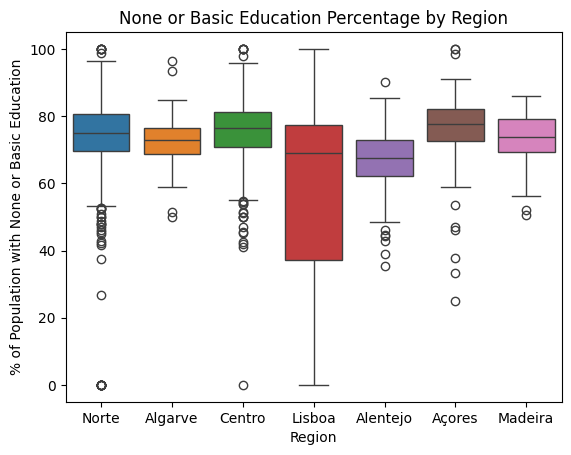

In [26]:
sns.boxplot(
    data=ed_nb_sum,
    x="NUTS2_region",
    y="none_basic_perc",
    hue="NUTS2_region"
)
plt.title('None or Basic Education Percentage by Region')
plt.xlabel('Region')
plt.ylabel('% of Population with None or Basic Education')
plt.show()

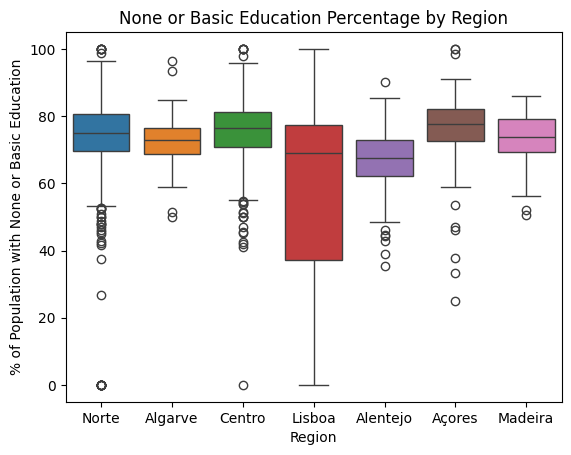

In [27]:
sns.boxplot(
    data=ed_nb_sum,
    x="NUTS2_region",
    y="none_basic_perc",
    hue="NUTS2_region"
)
plt.title('None or Basic Education Percentage by Region')
plt.xlabel('Region')
plt.ylabel('% of Population with None or Basic Education')
plt.show()

In [28]:
ed_nb_region_medians = ed_nb_sum.groupby('NUTS2_region')['none_basic_perc'].median().reset_index()
ed_nb_region_medians

,NUTS2_region,none_basic_perc
0,Alentejo,67.660
1,Algarve,72.920
2,Açores,77.680
3,Centro,76.490
4,Lisboa,68.965
5,Madeira,73.865
6,Norte,75.000


In [29]:
ed_nb_region_means = ed_nb_sum.groupby('NUTS2_region')['none_basic_perc'].mean().reset_index()
ed_nb_region_means

,NUTS2_region,none_basic_perc
0,Alentejo,67.145117
1,Algarve,72.461194
2,Açores,76.353846
3,Centro,75.731728
4,Lisboa,56.117712
5,Madeira,73.097778
6,Norte,74.275112


In [30]:
ed_no_totals.head()

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region,ed_level_perc
780,111160101,Aboim das Choças,5,2019,15,None,Norte,15.96
781,111160102,Aguiã,5,2019,24,None,Norte,24.24
782,111160104,Ázere,5,2019,3,None,Norte,4.41
783,111160105,Cabana Maior,5,2019,24,None,Norte,38.10
784,111160106,Cabreiro,5,2019,66,None,Norte,32.35


In [31]:
ed_secondary_plus = ed_no_totals[ed_no_totals['el.education_level'].isin(['Secondary / post-secondary', 'Superior'])]
ed_sp_sum = ed_secondary_plus.groupby(['NutsID', 'region_name', 'NUTS2_region'])['ed_level_perc'].sum().reset_index()
ed_sp_sum.rename(columns={'ed_level_perc': 'secondary_plus_perc'}, inplace=True)

In [32]:
ed_sp_sum.describe()

,secondary_plus_perc
count,3092.000000
mean,25.698939
std,10.475313
min,0.000000
25%,19.372500
50%,25.000000
75%,31.080000
max,100.000000


In [33]:
ed_no_totals[ed_no_totals['region_name'] == 'Aboim das Choças']

,NutsID,region_name,NUTS_level,e.year,e.value,el.education_level,NUTS2_region,ed_level_perc
780,111160101,Aboim das Choças,5,2019,15,None,Norte,15.96
1560,111160101,Aboim das Choças,5,2019,61,Basic,Norte,64.89
2340,111160101,Aboim das Choças,5,2019,11,Secondary / post-secondary,Norte,11.70
3120,111160101,Aboim das Choças,5,2019,7,Superior,Norte,7.45


In [34]:
ed_split_perc = ed_sp_sum

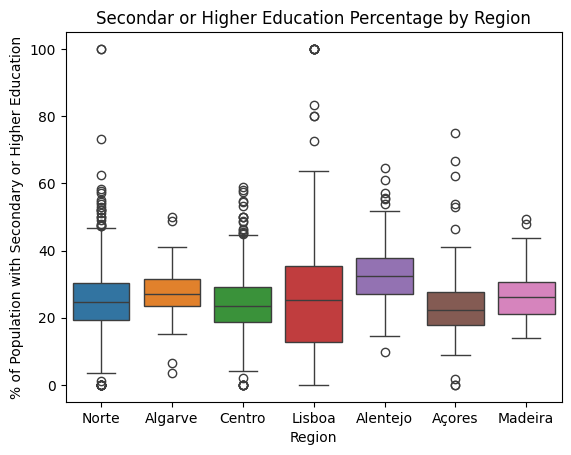

In [35]:
sns.boxplot(
    data=ed_sp_sum,
    x="NUTS2_region",
    y="secondary_plus_perc",
    hue="NUTS2_region"
)
plt.title('Secondar or Higher Education Percentage by Region')
plt.xlabel('Region')
plt.ylabel('% of Population with Secondary or Higher Education')
plt.show()

In [36]:
ed_all_ed_levels = ed_no_totals.loc[:, ['NutsID', 'region_name', 'el.education_level', 'ed_level_perc', 'NUTS2_region']]

In [37]:
ed_all_ed_levels

,NutsID,region_name,el.education_level,ed_level_perc,NUTS2_region
780,111160101,Aboim das Choças,None,15.96,Norte
781,111160102,Aguiã,None,24.24,Norte
782,111160104,Ázere,None,4.41,Norte
783,111160105,Cabana Maior,None,38.10,Norte
784,111160106,Cabreiro,None,32.35,Norte
...,...,...,...,...,...
15455,300310906,Ilha,Superior,9.03,Madeira
15456,300311001,Boa Ventura,Superior,6.68,Madeira
15457,300311002,Ponta Delgada,Superior,7.99,Madeira
15458,300311003,São Vicente,Superior,11.10,Madeira


In [38]:
ed_split_perc

,NutsID,region_name,NUTS2_region,secondary_plus_perc
0,111160101,Aboim das Choças,Norte,19.15
1,111160102,Aguiã,Norte,7.07
2,111160104,Ázere,Norte,25.00
3,111160105,Cabana Maior,Norte,7.94
4,111160106,Cabreiro,Norte,15.19
...,...,...,...,...
3087,300310906,Ilha,Madeira,23.87
3088,300311001,Boa Ventura,Madeira,19.50
3089,300311002,Ponta Delgada,Madeira,22.13
3090,300311003,São Vicente,Madeira,25.77


# Labour

In [39]:
labour5_df.head(10)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,NUTS2_region
0,111160101,Aboim das Choças,5,2019,35,Total labour force in agriculture,Norte
1,111160101,Aboim das Choças,5,2019,34,Family labour force,Norte
2,111160101,Aboim das Choças,5,2019,15,Holder,Norte
3,111160101,Aboim das Choças,5,2019,13,Spouse,Norte
4,111160101,Aboim das Choças,5,2019,6,Other family members,Norte
5,111160101,Aboim das Choças,5,2019,2,Non-family labour force,Norte
6,111160101,Aboim das Choças,5,2019,1,Regular,Norte
7,111160101,Aboim das Choças,5,2019,0,Non-regular,Norte
8,111160101,Aboim das Choças,5,2019,0,Workers not hired by the holder,Norte
9,111160102,Aguiã,5,2019,72,Total labour force in agriculture,Norte


In [40]:
lab_no_totals = labour5_df[labour5_df['ltn.type_labour'] != 'Total labour force in agriculture'].copy()
lab_totals = labour5_df[(labour5_df['ltn.type_labour'] == 'Family labour force') |
                        (labour5_df['ltn.type_labour'] == 'Non-family labour force')].copy()
lab_split_totals = labour5_df[(labour5_df['ltn.type_labour'] != 'Total labour force in agriculture') & 
                              (labour5_df['ltn.type_labour'] != 'Family labour force') &
                              (labour5_df['ltn.type_labour'] != 'Non-family labour force')].copy()

In [41]:
lab_totals.head()

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,NUTS2_region
1,111160101,Aboim das Choças,5,2019,34,Family labour force,Norte
5,111160101,Aboim das Choças,5,2019,2,Non-family labour force,Norte
10,111160102,Aguiã,5,2019,70,Family labour force,Norte
14,111160102,Aguiã,5,2019,3,Non-family labour force,Norte
19,111160104,Ázere,5,2019,18,Family labour force,Norte


In [42]:
lab_totals = lab_totals.groupby(['NutsID', 'region_name', 'NUTS2_region'])['l.value'].sum().reset_index()
lab_split_totals = lab_split_totals.groupby(['NutsID', 'region_name', 'NUTS2_region'])['l.value'].sum().reset_index()

In [48]:
def lab_percentage(row):
    if (row['ltn.type_labour'] == 'Family labour force') or (row['ltn.type_labour'] == 'Non-family labour force'):
        id = row['NutsID']
        value = row['l.value']
        total = lab_totals[lab_totals['NutsID'] == id]['l.value'].values[0]
    else:
        id = row['NutsID']
        value = row['l.value']
        total = lab_split_totals[lab_split_totals['NutsID'] == id]['l.value'].values[0]
    if total == 0:
        return None
    else:
        return round((value / total) * 100, 2)

In [49]:
lab_no_totals.loc[:, 'lab_level_perc'] = lab_no_totals.apply(lab_percentage, axis=1)

In [50]:
lab_no_totals.head(35)

,NutsID,region_name,NUTS_level,l.year,l.value,ltn.type_labour,NUTS2_region,lab_level_perc
1,111160101,Aboim das Choças,5,2019,34,Family labour force,Norte,94.44
2,111160101,Aboim das Choças,5,2019,15,Holder,Norte,42.86
3,111160101,Aboim das Choças,5,2019,13,Spouse,Norte,37.14
4,111160101,Aboim das Choças,5,2019,6,Other family members,Norte,17.14
5,111160101,Aboim das Choças,5,2019,2,Non-family labour force,Norte,5.56
6,111160101,Aboim das Choças,5,2019,1,Regular,Norte,2.86
7,111160101,Aboim das Choças,5,2019,0,Non-regular,Norte,0.00
8,111160101,Aboim das Choças,5,2019,0,Workers not hired by the holder,Norte,0.00
10,111160102,Aguiã,5,2019,70,Family labour force,Norte,95.89
11,111160102,Aguiã,5,2019,38,Holder,Norte,52.78


In [ ]:
lab_nonfam = lab_no_totals[lab_no_totals['ltn.type_labour'] == 'Non-family labour force'].copy()

In [ ]:
sns.boxplot(
    data=lab_nonfam,
    x="NUTS2_region",
    y="lab_level_perc",
    hue="NUTS2_region"
)
plt.title('Non-family Labour Percentage by Region')
plt.xlabel('Region')
plt.ylabel('% of Non-family Labour Force')
plt.show()

In [ ]:
lab_split_perc = lab_nonfam.loc[:, ['NutsID', 'region_name', 'NUTS2_region', 'lab_level_perc']]
lab_split_perc.rename(columns={'lab_level_perc': 'non_family_perc'}, inplace=True)
lab_split_perc

# Production

In [ ]:
prod5_df.head()

In [ ]:
prod5_df.isna().sum()

In [ ]:
sns.boxplot(
    data=prod5_df,
    x="NUTS2_region",
    y="p.value_eur",
    hue="NUTS2_region"
)

In [ ]:
sns.boxplot(
    data=prod5_df,
    x="NUTS2_region",
    y="p.area_ha",
    hue="NUTS2_region"
)

In [ ]:
prod5_df.head()

In [ ]:
prod_amounts = prod5_df.loc[:, ['NutsID', 'region_name', 'NUTS2_region', 'p.value_eur', 'p.area_ha']]
prod_amounts

# Permanent Crops

In [ ]:
permcrop5_df.head()

In [ ]:
permcrop5_df.isna().sum()

In [ ]:
permcrop5_df['pc.avg_area_hold'] = round(permcrop5_df['pc.area'] / permcrop5_df['pc.hold'], 3)

In [ ]:
permcrop_total = permcrop5_df[permcrop5_df['pcn.crop_name'] == 'Total'].copy()

In [ ]:
permcrop_total.head()

In [ ]:
sns.boxplot(
    data=permcrop_total,
    x="NUTS2_region",
    y="pc.area",
    hue="NUTS2_region"
)
plt.ylim(0, 3500)
plt.show()

In [ ]:
sns.boxplot(
    data=permcrop_total,
    x="NUTS2_region",
    y="pc.hold",
    hue="NUTS2_region"
)

In [ ]:
sns.boxplot(
    data=permcrop_total,
    x="NUTS2_region",
    y="pc.avg_area_hold",
    hue="NUTS2_region"
)
plt.ylim(0, 100)
plt.show()

In [ ]:
permcrop_amounts = permcrop_total.loc[:, ['NutsID', 
                                          'region_name', 
                                          'NUTS2_region', 
                                          'pc.area', 
                                          'pc.hold', 
                                          'pc.avg_area_hold']]
permcrop_amounts

# Temporary Crops

In [ ]:
tempcrop5_df.head()

In [ ]:
tempcrop5_df.isna().sum()

In [ ]:
tempcrop5_df['tc.avg_area_hold'] = round(tempcrop5_df['tc.area'] / tempcrop5_df['tc.hold'], 3)

In [ ]:
tempcrop_total = tempcrop5_df[tempcrop5_df['tcn.crop_name'] == 'Total'].copy()
tempcrop_total.head()

In [ ]:
sns.boxplot(
    data=tempcrop_total,
    x="NUTS2_region",
    y="tc.area",
    hue="NUTS2_region"
)
plt.ylim(0, 5000)
plt.show()

In [ ]:
sns.boxplot(
    data=tempcrop_total,
    x="NUTS2_region",
    y="tc.hold",
    hue="NUTS2_region"
)

In [ ]:
sns.boxplot(
    data=tempcrop_total,
    x="NUTS2_region",
    y="tc.avg_area_hold",
    hue="NUTS2_region"
)
plt.ylim(0, 100)
plt.show()

In [ ]:
tempcrop_amounts = tempcrop_total.loc[:, ['NutsID', 
                                          'region_name', 
                                          'NUTS2_region', 
                                          'tc.area', 
                                          'tc.hold', 
                                          'tc.avg_area_hold']]
tempcrop_amounts

# Merging dataframes

In [ ]:
df_merged = ed_split_perc.merge(lab_split_perc[['NutsID', 'non_family_perc']], on='NutsID')
df_merged = df_merged.merge(prod_amounts[['NutsID', 'p.value_eur', 'p.area_ha']], on='NutsID', how='left')
df_merged = df_merged.merge(permcrop_amounts[['NutsID', 'pc.area', 'pc.hold', 'pc.avg_area_hold']], on='NutsID')
df_merged = df_merged.merge(tempcrop_amounts[['NutsID', 'tc.area', 'tc.hold', 'tc.avg_area_hold']], on='NutsID')

In [ ]:
df_merged

# PCA

In [ ]:
def corrdot(*args, **kwargs):
    corr_r = args[0].corr(args[1], 'pearson')
    corr_text = f"{corr_r:2.2f}".replace("0.", ".")
    ax = plt.gca()
    ax.set_axis_off()
    marker_size = abs(corr_r) * 10000
    ax.scatter([.5], [.5], marker_size, [corr_r], alpha=0.6, cmap="coolwarm",
               vmin=-1, vmax=1, transform=ax.transAxes)
    font_size = abs(corr_r) * 40 + 5
    ax.annotate(corr_text, [.5, .5,],  xycoords="axes fraction",
                ha='center', va='center', fontsize=font_size)

sns.set(style='white', font_scale=1.6)

g = sns.PairGrid(df_merged, aspect=1.4, diag_sharey=False)
g.map_lower(sns.regplot, lowess=True, ci=False, line_kws={'color': 'black'})
g.map_diag(sns.histplot, kde_kws={'color': 'black'})
g.map_upper(corrdot);

In [ ]:
df_merged_nona = df_merged.dropna()

In [ ]:
df_scaled = StandardScaler().fit_transform(df_merged_nona.iloc[:, 3:])

pca = PCA(n_components=2)
PC = pca.fit_transform(df_scaled)

In [ ]:
def biplot(score,coef,hue,labels=None): 
 
    xs = score[:,0] # PC1 object scores
    ys = score[:,1] # PC2 object scores 
    n = coef.shape[0] # number of dimensions (2)
    scalex = 1.0/(xs.max() - xs.min()) # to rescale scores
    scaley = 1.0/(ys.max() - ys.min()) # to rescale scores
    sns.scatterplot(x=xs * scalex,
                    y=ys * scaley,
                    hue=hue,
                    s=8, 
                    color='blue') # scatter plot using rescaled object scores
 
    for i in range(n):
        plt.arrow(0, 0, coef[i,0], 
                  coef[i,1],color = 'red',
                  head_width=0.01,
                  alpha = 0.5) # plot arrows for each variable
        plt.text(coef[i,0]* 1.15, 
                 coef[i,1] * 1.15, 
                 labels[i], 
                 color = 'red', 
                 ha = 'center', 
                 va = 'center',
                 fontsize = 'xx-small') # variable labels for each arrow

    plt.xlabel("PC{}".format(1))
    plt.ylabel("PC{}".format(2))    
 
 
    plt.figure()

In [ ]:
df_merged_nona.columns

In [ ]:
plt.figure(figsize=(10, 8))
plt.title('Biplot of PCA')
 
biplot(PC, 
       np.transpose(pca.components_), 
       df_merged_nona['NUTS2_region'].tolist(),
       list(df_merged_nona.columns[3:]))
plt.show()

In [ ]:
# scree plot

df_scree = df_merged_nona.iloc[:, 3:]

scree_scaled = StandardScaler().fit_transform(df_scree)
df_scree_scaled = pd.DataFrame(data=scree_scaled, columns=df_scree.columns)
df_scree_scaled.head()

In [ ]:
pca = PCA(n_components=10)
pca.fit_transform(df_scree_scaled)

In [ ]:
eigenvalues = pca.explained_variance_ # eigenvalues
prop_var = pca.explained_variance_ratio_ # proportion of explained variance

In [ ]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         prop_var,
         'ro-')
plt.title('Scree Plot', fontsize=20)
plt.ylabel('Proportion of Variance', fontsize=16)
plt.show()

In [ ]:
PC_numbers = np.arange(pca.n_components_) + 1
 
plt.plot(PC_numbers, 
         eigenvalues,
         'ro-')
plt.title('Scree Plot', fontsize=20)
plt.ylabel('Eigenvalues', fontsize=16)
plt.axhline(y=1, color='r', 
            linestyle='--')
plt.show()

# Production vs Education

In [ ]:
df_merged.head()

In [ ]:
df_prod_ed = df_merged[['NutsID', 'region_name', 'NUTS2_region', 'secondary_plus_perc', 'p.value_eur', 'p.area_ha']]
df_prod_ed.head()

In [ ]:
sns.scatterplot(
    data = df_prod_ed,
    x = 'p.area_ha',
    y = 'secondary_plus_perc',
    hue = 'NUTS2_region'
)

In [ ]:
sns.scatterplot(
    data = df_prod_ed,
    x = 'p.value_eur',
    y = 'secondary_plus_perc',
    hue = 'NUTS2_region'
)

In [ ]:
df_prod_ed_nona = df_prod_ed.dropna()

# Define the dependent variable (y) and independent variable (x)
y = df_prod_ed_nona['secondary_plus_perc']
x = df_prod_ed_nona['p.area_ha']

# Add a constant (intercept) to the independent variable
x = sm.add_constant(x)

# Perform linear regression
model = sm.OLS(y, x).fit()

# Print the regression summary
print(model.summary())

# Plot the regression line
plt.scatter(x.loc[:, 'p.area_ha'], y)  # scatter plot of data points
plt.xlabel('p.area_ha')
plt.ylabel('secondary_plus_perc')

# Plot the regression line
plt.plot(x.loc[:, 'p.area_ha'], model.fittedvalues, 'r')  # regression line

plt.show()

In [ ]:
df_prod_ed_nona = df_prod_ed.dropna()

# Define the dependent variable (y) and independent variable (x)
y = df_prod_ed_nona['secondary_plus_perc']
x = df_prod_ed_nona['p.value_eur']

# Add a constant (intercept) to the independent variable
x = sm.add_constant(x)

# Perform linear regression
model = sm.OLS(y, x).fit()

# Print the regression summary
print(model.summary())

# Plot the regression line
plt.scatter(x.loc[:, 'p.value_eur'], y)  # scatter plot of data points
plt.xlabel('p.value_eur')
plt.ylabel('secondary_plus_perc')

# Plot the regression line
plt.plot(x.loc[:, 'p.value_eur'], model.fittedvalues, 'r')  # regression line

plt.show()